### Data
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
### Objective:
This dataset includes reported incidents of crime (with the exception of murders, for which data is available for each victim) that occurred in the City of Chicago between 2001 and the present, minus the most recent seven days. The information is derived from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. Addresses are shown at the block level only to protect the privacy of crime victims, and specific locations are not identified.
### Data Description
1. ID -  Unique identifier for the record. 
2. Case Number - The Chicago Police Department RD Number
3. Date - Date when the incident occurred. this is sometimes a best estimate.
4. Block - The partially redacted address where the incident occurred.
5. IUCR - The Illinois Unifrom Crime Reporting code.
6. Primary Type - The primary description of the IUCR code.
7. Description - The secondary description of the IUCR code, a subcategory of the primary description.
8.  Location Description - Description of the location where the incident occurred.
9. Arrest - Indicates whether an arrest was made.
10. Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
11. Beat - Indicates the beat where the incident occurred.
12. District - Indicates the police district where the incident occurred.
13. Ward - The ward (City Council district) where the incident occurred.
14. Community Area - Indicates the community area where the incident occurred.
15. FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
16. X Coordinate - The x coordinate of the location where the incident occurred
17. Y Coordinate - The y coordinate of the location where the incident occurred
18. Year - Year the incident occurred.
19. Updated On - Date and time the record was last updated.
20. Latitude - The latitude of the location where the incident occurred
21. Longitude - The longitude of the location where the incident occurred. 
22. The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. 

### Basic Analysis

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Chunking the data 

In [2]:
raw_data=pd.read_csv("Crimes_-_2001_to_Present.csv",low_memory=False,chunksize=100000)

dfList = []
for i in raw_data:
    dfList.append(i)
    break
    
Crimes_Data = pd.concat(dfList,sort=False)

In [3]:
Crimes_Data.to_csv("Chicago_Crimes_Filtered_Data")

### Working with new dataframe

In [4]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


### Information about the dataframe

In [5]:
Crimes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Case Number           100000 non-null  object 
 2   Date                  100000 non-null  object 
 3   Block                 100000 non-null  object 
 4   IUCR                  100000 non-null  object 
 5   Primary Type          100000 non-null  object 
 6   Description           100000 non-null  object 
 7   Location Description  99729 non-null   object 
 8   Arrest                100000 non-null  bool   
 9   Domestic              100000 non-null  bool   
 10  Beat                  100000 non-null  int64  
 11  District              100000 non-null  int64  
 12  Ward                  99995 non-null   float64
 13  Community Area        99995 non-null   float64
 14  FBI Code              100000 non-null  object 
 15  X

### Dimensionalities of the dataframe

In [6]:
print("Number of rows ",Crimes_Data.shape[0])
print("Number of Columns ",Crimes_Data.shape[1])

Number of rows  100000
Number of Columns  22


### Histogram of the dataframe

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Beat'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Ward'}>,
        <AxesSubplot:title={'center':'Community Area'}>,
        <AxesSubplot:title={'center':'X Coordinate'}>],
       [<AxesSubplot:title={'center':'Y Coordinate'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

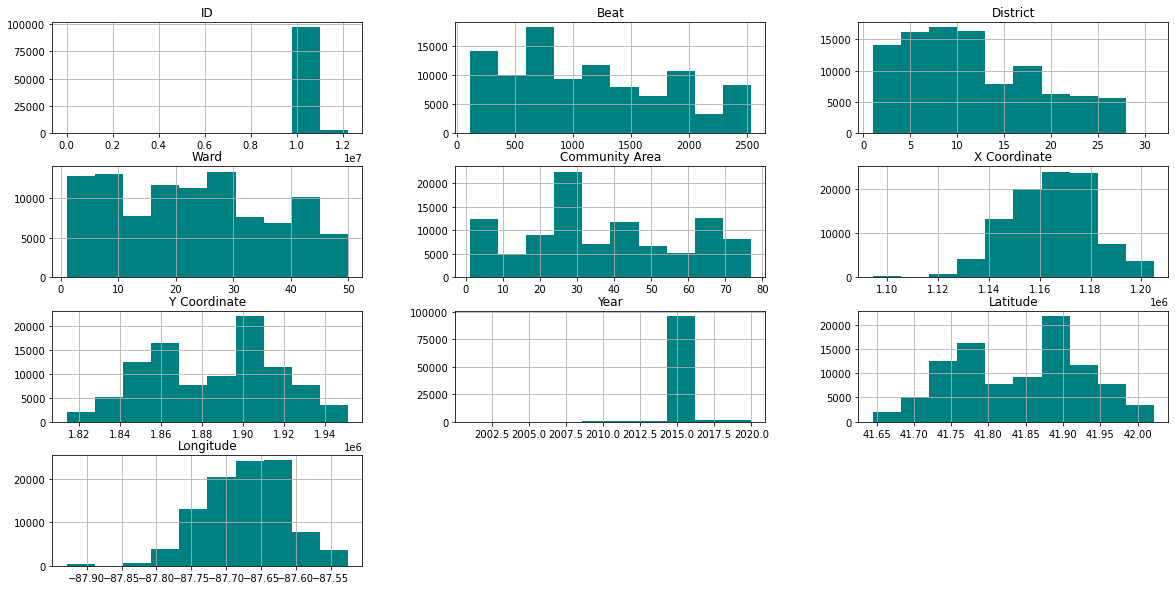

In [7]:
Crimes_Data.hist(color='teal',figsize=(20,10))

1. There don't appear to be any obvious data quality issues.
2. We'll need to standardize the features because we'll have more numerical, but on different scales.

### Descriptive statistics of a Dataframe


In [8]:
Crimes_Data.describe()


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.000000e+05,100000.000000,100000.000000,99995.000000,99995.000000,9.777600e+04,9.777600e+04,100000.000000,97776.000000,97776.000000
mean,1.027929e+07,1142.603950,11.197060,22.885394,37.357988,1.164596e+06,1.885794e+06,2015.052490,41.842214,-87.671516
std,2.891364e+05,693.542944,6.929218,13.906594,21.423438,1.635833e+04,3.112593e+04,0.679382,0.085606,0.059545
min,1.016000e+03,111.000000,1.000000,1.000000,1.000000,1.094231e+06,1.813910e+06,2001.000000,41.644604,-87.928909
25%,1.019590e+07,612.000000,6.000000,10.000000,23.000000,1.152705e+06,1.858866e+06,2015.000000,41.768112,-87.714677
50%,1.024922e+07,1023.000000,10.000000,23.000000,32.000000,1.166248e+06,1.891648e+06,2015.000000,41.858459,-87.665422
75%,1.029266e+07,1711.000000,17.000000,34.000000,56.000000,1.176405e+06,1.908603e+06,2015.000000,41.904915,-87.627930
max,1.224746e+07,2535.000000,31.000000,50.000000,77.000000,1.205111e+06,1.951507e+06,2020.000000,42.022548,-87.524615


### Replacing Nan Values with 0 and changing the datatypes to "Integer"

In [9]:
Crimes_Data["Ward"].unique()

array([12., 29.,  8., 35., 28., 21., 32., 25., 27., 15., 13., 45., 34.,
        4.,  1., 10., 38.,  5.,  7.,  2., 20., 39., 24., 40.,  6., 37.,
       16.,  3., 42., 46., 23.,  9., 19., 50., 44., 47., 11., 48., 49.,
       26., 33., 22., 30., 18., 43., 31., 36., 17., 14., 41., nan])

In [10]:
Crimes_Data["Ward"]= Crimes_Data["Ward"].replace(np.nan, 0)

In [11]:
Crimes_Data["Ward"]= Crimes_Data["Ward"].astype(int)

In [12]:
Crimes_Data["Ward"].unique()

array([12, 29,  8, 35, 28, 21, 32, 25, 27, 15, 13, 45, 34,  4,  1, 10, 38,
        5,  7,  2, 20, 39, 24, 40,  6, 37, 16,  3, 42, 46, 23,  9, 19, 50,
       44, 47, 11, 48, 49, 26, 33, 22, 30, 18, 43, 31, 36, 17, 14, 41,  0])

In [13]:
Crimes_Data["Community Area"].unique()

array([61., 25., 44., 21., 71., 24., 31., 27., 63., 65., 11., 49., 39.,
       51., 15., 52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23.,
       35.,  8.,  3.,  6., 56., 28., 53., 50., 33., 13., 74., 19., 45.,
       72., 22., 64.,  7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38.,
       41., 60., 30., 54., 58., 48., 73., 70., 40., 34., 16., 18.,  4.,
       17., 42., 37., 75., 62., 20., 57., 76., 47., nan,  9., 36., 55.])

In [14]:
Crimes_Data["Community Area"]= Crimes_Data["Community Area"].replace(np.nan, 0)
Crimes_Data["Community Area"]= Crimes_Data["Community Area"].astype(int)

In [15]:
Crimes_Data["Community Area"].unique()

array([61, 25, 44, 21, 71, 24, 31, 27, 63, 65, 11, 49, 39, 51, 15, 52, 12,
       43, 46, 32, 68, 14, 29,  2, 69, 23, 35,  8,  3,  6, 56, 28, 53, 50,
       33, 13, 74, 19, 45, 72, 22, 64,  7,  5, 26, 66, 59, 77,  1, 10, 67,
       38, 41, 60, 30, 54, 58, 48, 73, 70, 40, 34, 16, 18,  4, 17, 42, 37,
       75, 62, 20, 57, 76, 47,  0,  9, 36, 55])

In [16]:
Crimes_Data["X Coordinate"].unique()

array([1165074., 1138875.,      nan, ..., 1158698., 1153154., 1169805.])

### Missing Values

In [17]:
Crimes_Data.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     271
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            2224
Y Coordinate            2224
Year                       0
Updated On                 0
Latitude                2224
Longitude               2224
Location                2224
dtype: int64

### Frequency of Null Values

In [18]:
Frequency=Crimes_Data.isna().sum()/(len(Crimes_Data))*100
Frequency

ID                      0.000
Case Number             0.000
Date                    0.000
Block                   0.000
IUCR                    0.000
Primary Type            0.000
Description             0.000
Location Description    0.271
Arrest                  0.000
Domestic                0.000
Beat                    0.000
District                0.000
Ward                    0.000
Community Area          0.000
FBI Code                0.000
X Coordinate            2.224
Y Coordinate            2.224
Year                    0.000
Updated On              0.000
Latitude                2.224
Longitude               2.224
Location                2.224
dtype: float64

### Heat map for Null Values

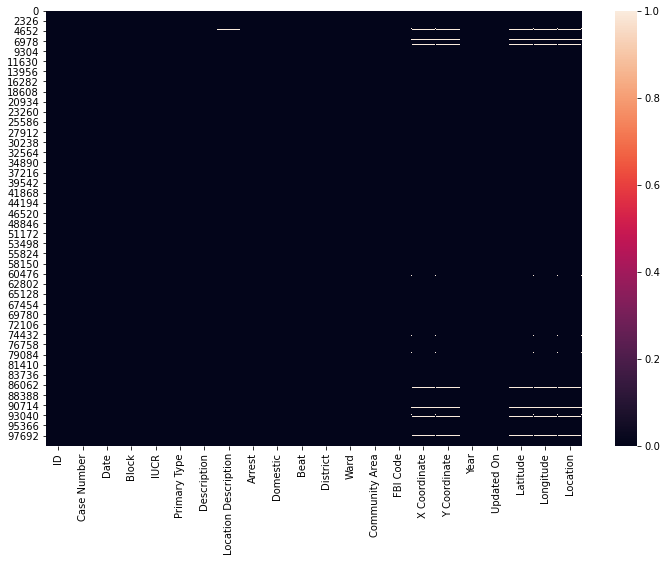

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(Crimes_Data.isna())
plt.show()

In [20]:
Crimes_Data["X Coordinate"] = Crimes_Data["X Coordinate"].fillna(value = 0.0)
Crimes_Data["Y Coordinate"] = Crimes_Data["Y Coordinate"].fillna(value = 0.0)
Crimes_Data["Latitude"] = Crimes_Data["Latitude"].fillna(value = 0.0)
Crimes_Data["Longitude"] = Crimes_Data["Longitude"].fillna(value = 0.0)
Crimes_Data["Location"] = Crimes_Data["Location"].fillna(value = 0.0)

In [21]:
Crimes_Data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

In [22]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [23]:
Crimes_Data.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    271
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            0
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

### Changing data types


In [24]:
Crimes_Data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [25]:
Crimes_Data["X Coordinate"].unique()

array([1165074., 1138875.,       0., ..., 1158698., 1153154., 1169805.])

In [26]:
Crimes_Data["X Coordinate"]= Crimes_Data["X Coordinate"].astype(int)

In [27]:
Crimes_Data["X Coordinate"].unique()

array([1165074, 1138875,       0, ..., 1158698, 1153154, 1169805])

In [28]:
Crimes_Data["Y Coordinate"].unique()


array([1875917., 1904869.,       0., ..., 1921288., 1918251., 1838702.])

In [29]:
Crimes_Data["Y Coordinate"]= Crimes_Data["Y Coordinate"].astype(int)

In [30]:
Crimes_Data["X Coordinate"].unique()

array([1165074, 1138875,       0, ..., 1158698, 1153154, 1169805])

In [31]:
Crimes_Data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate              int64
Y Coordinate              int64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

### Split timestamps into usable components


In [32]:
Crimes_Data.Date=pd.to_datetime(Crimes_Data.Date,format='%m/%d/%Y %I:%M:%S %p')
Crimes_Data.index=pd.DatetimeIndex(Crimes_Data.Date)

In [33]:
Crimes_Data['Day'] = pd.DatetimeIndex(Crimes_Data['Date']).day
Crimes_Data['Month'] = pd.DatetimeIndex(Crimes_Data['Date']).month
Crimes_Data['Time'] = pd.to_datetime(Crimes_Data['Date']).dt.time

In [34]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Day', 'Month', 'Time'],
      dtype='object')

In [35]:
Crimes_Data.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                        object
X Coordinate                     int64
Y Coordinate                     int64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Day                              int64
Month                            int64
Time                            object
dtype: object

In [36]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",5,9,13:30:00
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4,9,11:30:00
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,0,0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0.0,1,9,00:01:00
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",5,9,12:45:00
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",5,9,13:00:00


### Histogram plot after cleaning the data

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Beat'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Ward'}>,
        <AxesSubplot:title={'center':'Community Area'}>,
        <AxesSubplot:title={'center':'X Coordinate'}>,
        <AxesSubplot:title={'center':'Y Coordinate'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

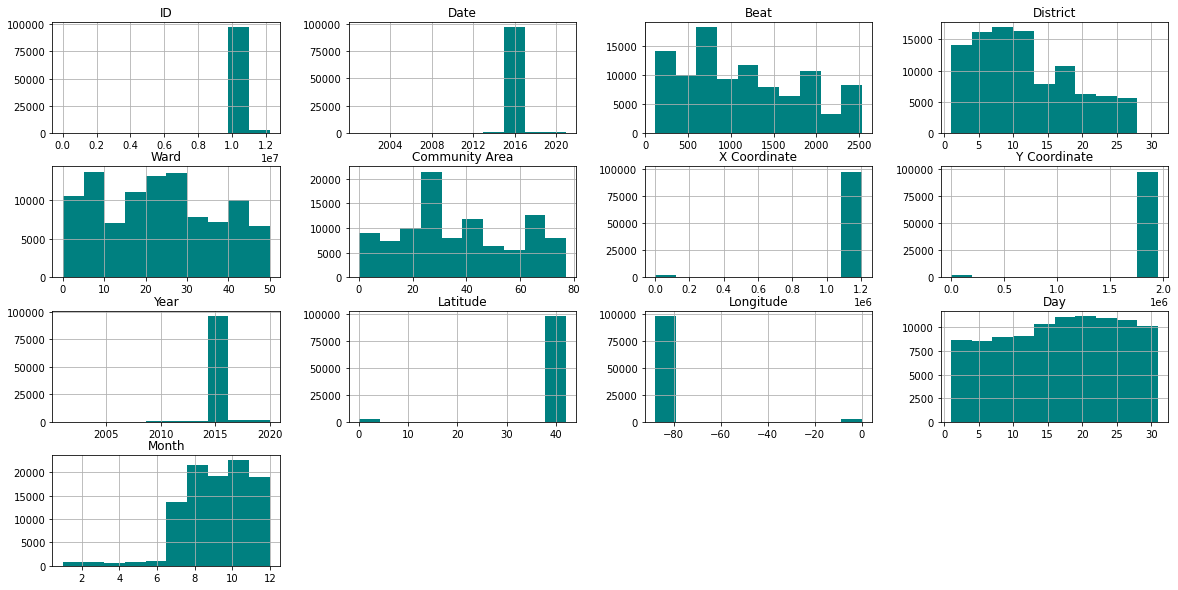

In [37]:
Crimes_Data.hist(color='teal',figsize=(20,10))

### Primary Type unique value counts

<AxesSubplot:>

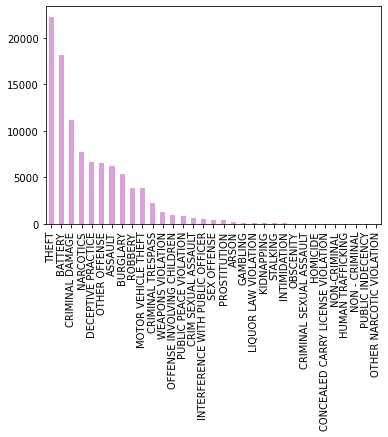

In [38]:
Crimes_Data["Primary Type"].value_counts().plot(kind='bar',color='plum')

### Top ten crimes 

In [39]:
Top_10_Crimes =  Crimes_Data['Primary Type'].value_counts().sort_values(ascending=False).head(10)
print(Top_10_Crimes)

THEFT                  22269
BATTERY                18128
CRIMINAL DAMAGE        11177
NARCOTICS               7729
DECEPTIVE PRACTICE      6702
OTHER OFFENSE           6586
ASSAULT                 6264
BURGLARY                5353
ROBBERY                 3911
MOTOR VEHICLE THEFT     3856
Name: Primary Type, dtype: int64


### Plotting top 10 crimes

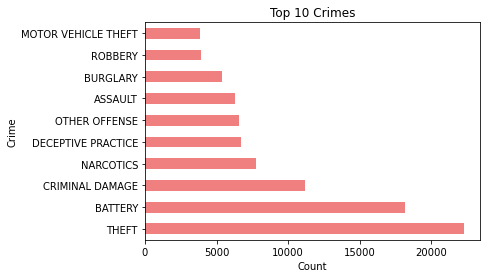

In [40]:
Top10Crimes = Crimes_Data.value_counts('Primary Type')[:10].\
    plot(kind = 'barh',\
         title = "Top 10 Crimes", color='lightcoral'
        )

Top10Crimes.set_xlabel("Count")
Top10Crimes.set_ylabel("Crime")
plt.show()


### Arrest unique value counts

<AxesSubplot:>

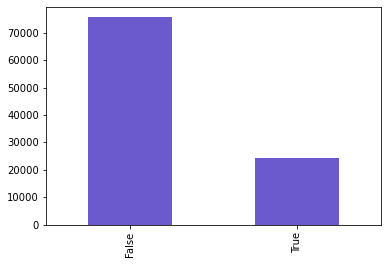

In [41]:
Crimes_Data.Arrest.value_counts().plot(kind='bar',color='slateblue')

### People arrested in different crimes

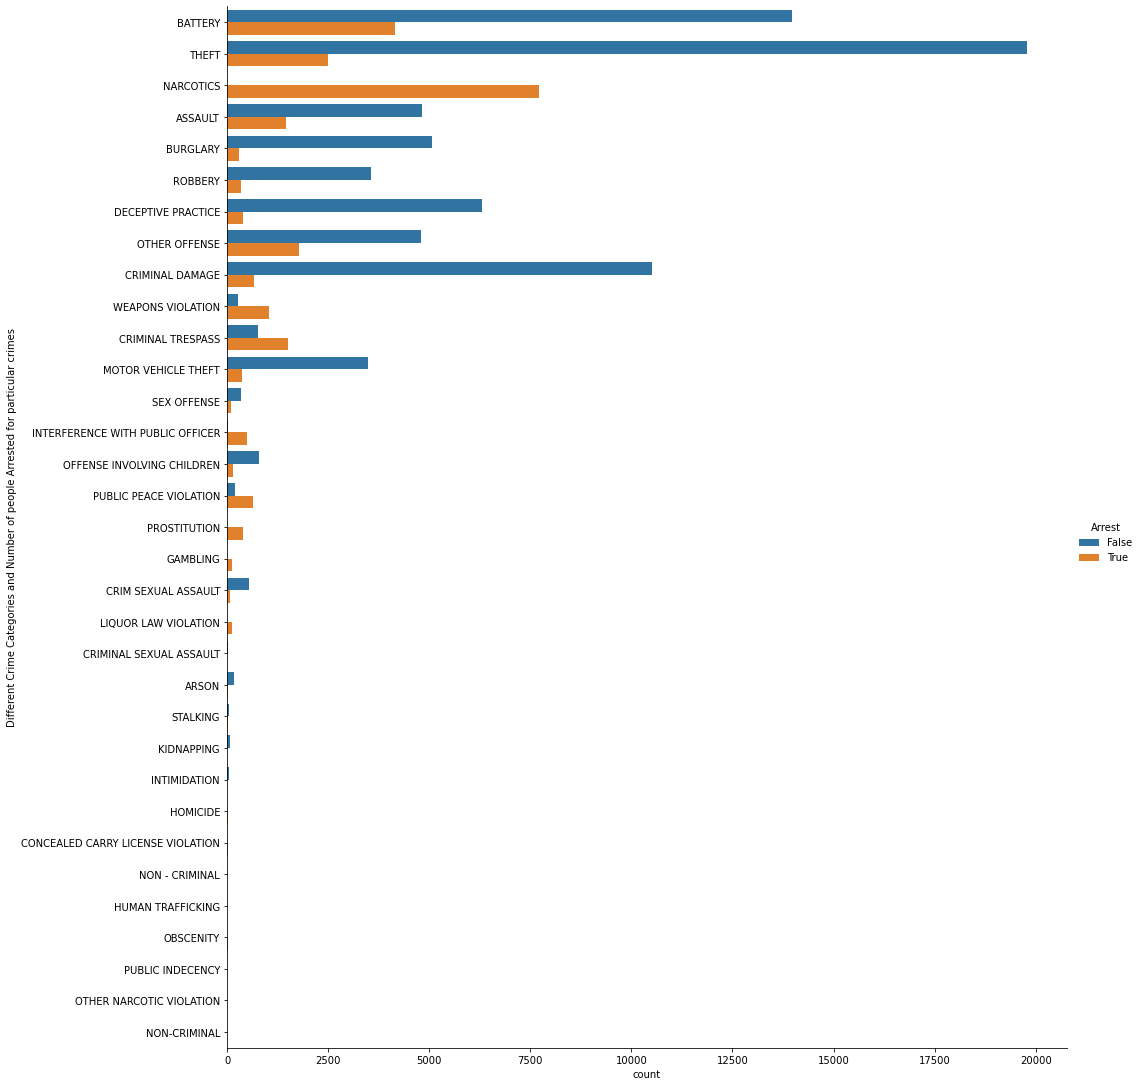

In [42]:
Arrested_Data = sns.factorplot(y="Primary Type", hue="Arrest", kind="count",
                   data=Crimes_Data,size=15)
Arrested_Data.set_ylabels("Different Crime Categories and Number of people Arrested for particular crimes") 

### The aggregation of the arrest count

In [43]:
Arrested=Crimes_Data.groupby('Arrest')['Arrest'].agg('count').sort_values(ascending=False)
Arrested

Arrest
False    75591
True     24409
Name: Arrest, dtype: int64

### Crimes per district

Text(0.5, 1.0, 'Crime per police district ')

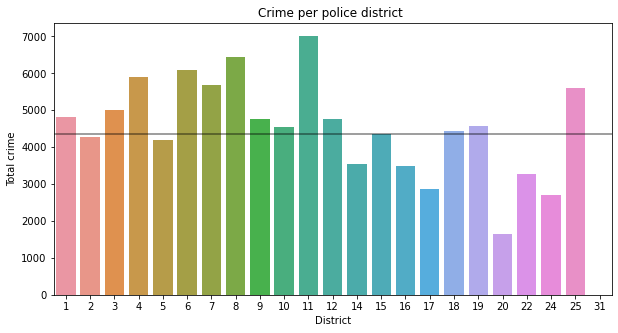

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x = Crimes_Data['District'])
plt.axhline(Crimes_Data['District'].value_counts().mean(), color = 'black', alpha = 0.5)
plt.xlabel('District')
plt.ylabel('Total crime')
plt.title('Crime per police district ')

### Number of crimes per month in a year

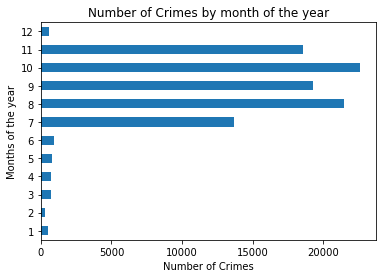

In [45]:
Crimes_Data.groupby([Crimes_Data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of Crimes')
plt.title('Number of Crimes by month of the year')
plt.show()

### Number of crimes by location

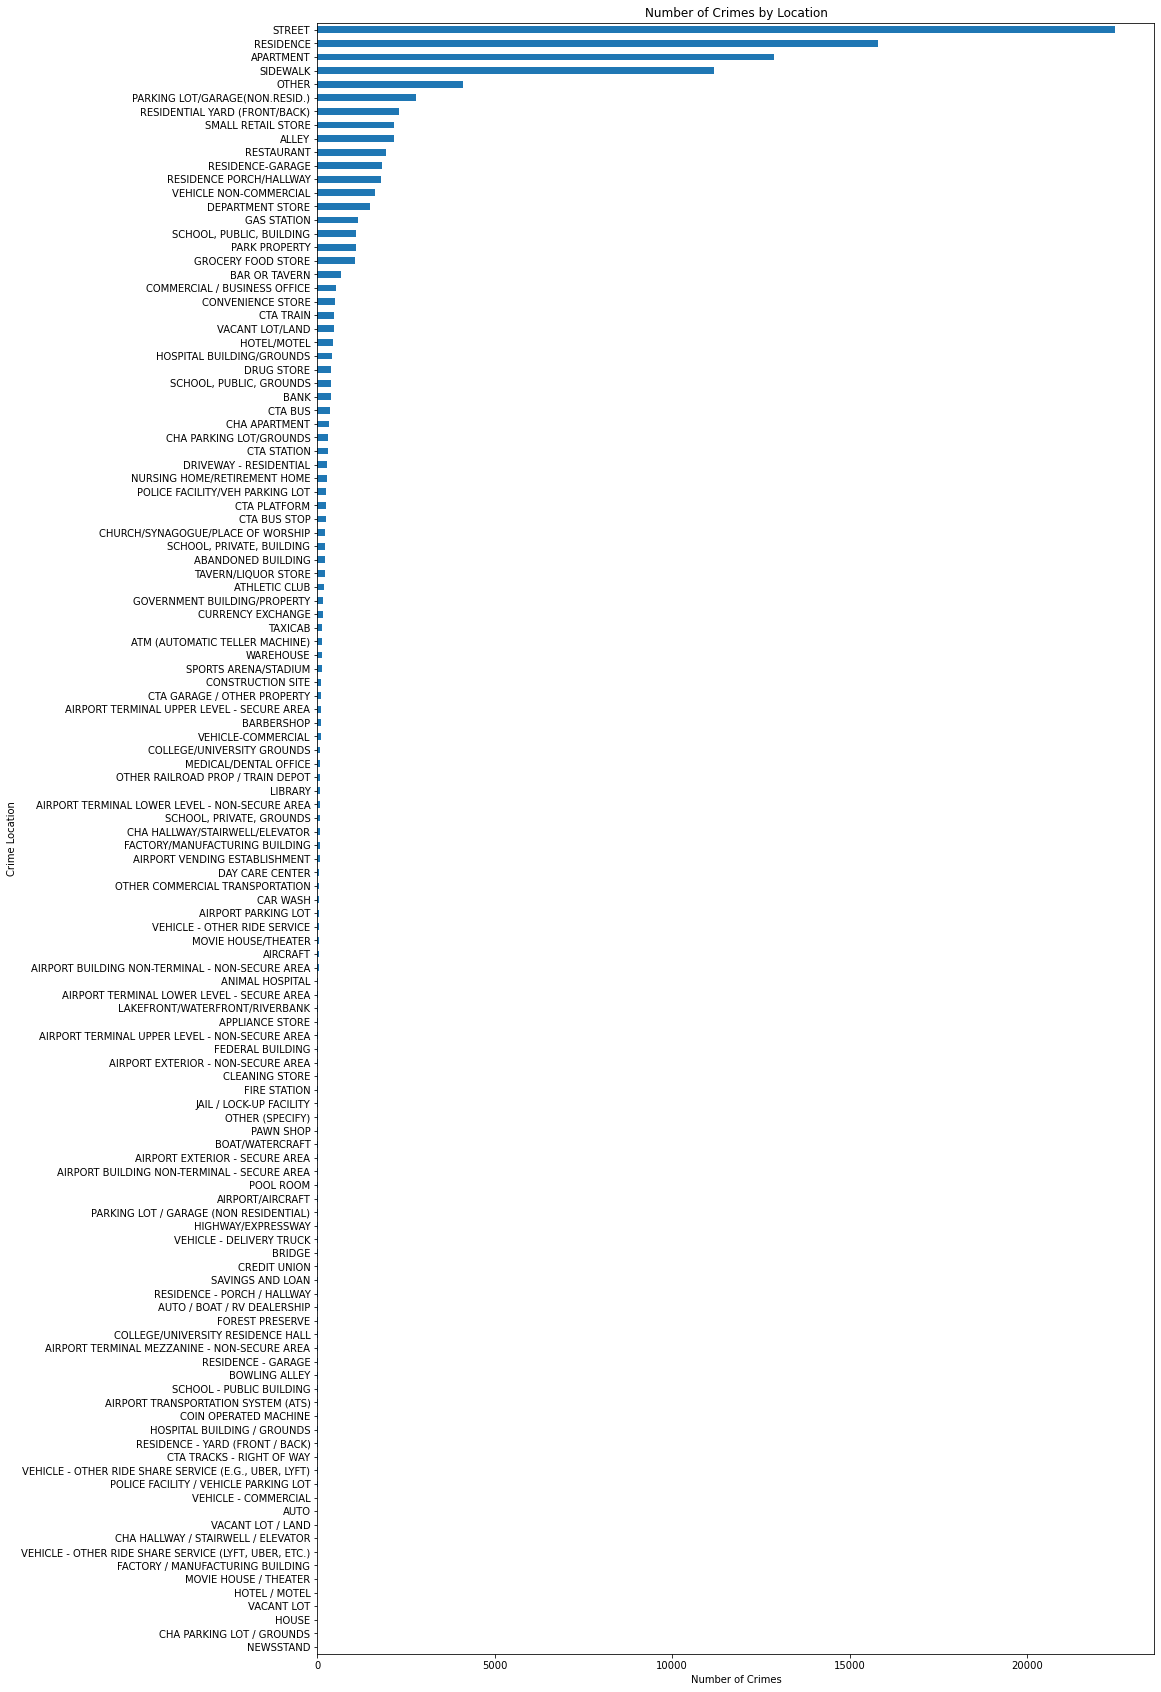

In [46]:
plt.figure(figsize=(15,30))
Crimes_Data.groupby([Crimes_Data['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of Crimes')
plt.show()

### Number of criminals arrested using pieplot in percentages

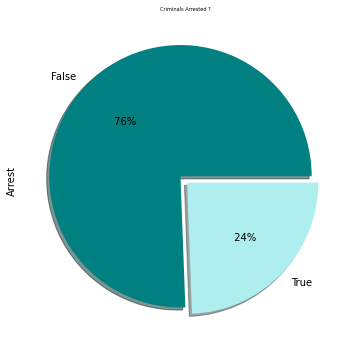

In [47]:
Arrested.plot(kind='pie',figsize=(5,5),autopct="%3.0f%%",colors=['teal','paleturquoise'],shadow=True,fontsize=10,explode=[0.05,.02])

plt.title('Criminals Arrested ?',fontsize=5)

plt.tight_layout()

### Distribution of crimes by community area

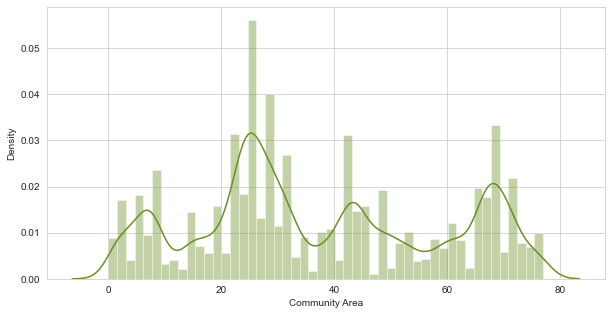

In [48]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Crimes_Data["Community Area"], color='olivedrab')
plt.show()

### Distribution of crimes by Accidents occured

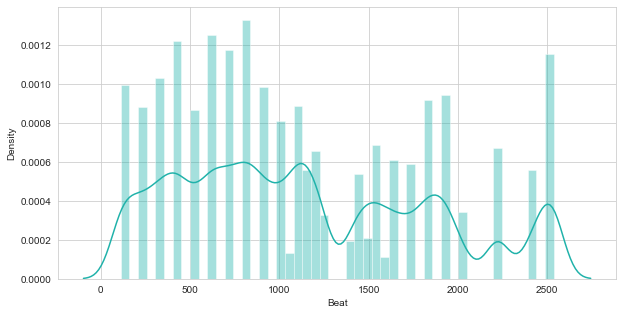

In [49]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.distplot(Crimes_Data["Beat"],color='lightseagreen')
plt.show()

 Here if we observe the distribution higher in between the 500 to 1000

In [50]:
Crimes_Data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",5,9,13:30:00
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4,9,11:30:00
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,0,0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0.0,1,9,00:01:00
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",5,9,12:45:00
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",5,9,13:00:00


### Correlation of the Dataframe

<AxesSubplot:>

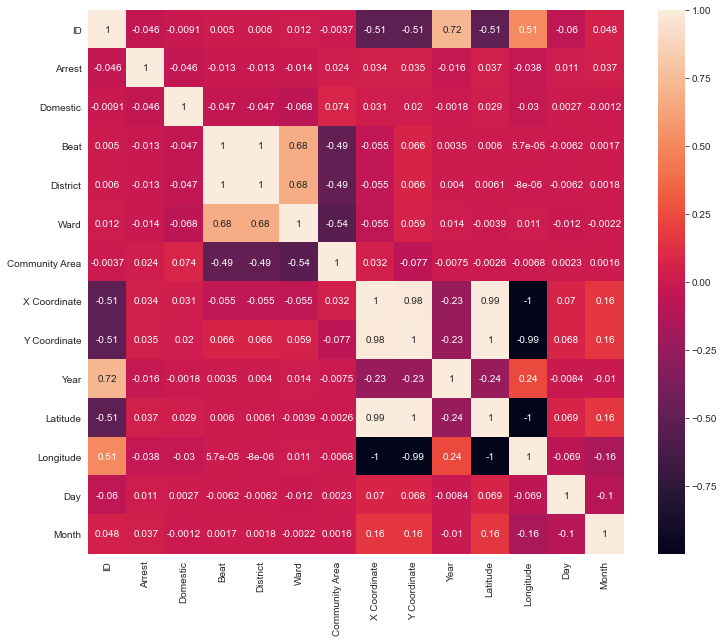

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(Crimes_Data.corr(),annot=True)

In [52]:
Crimes_Data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Day', 'Month', 'Time'],
      dtype='object')

### Feature selection for the modeling
1. Since we are restricting the problem data to that which can be obtained , we are gonna drop all but those variables.
2. As for the target variable, we are only considering the 'Primary Type'.





In [53]:
Chicago_Crimes_Data =  Crimes_Data.drop(['ID','Date', 'Block',
       'Description','Beat', 'District', 'Ward',
       'Community Area', 'X Coordinate', 'Y Coordinate', 'Year',
       'Updated On', 'Latitude', 'Longitude', 'Location', 'Day', 'Month',
       'Time','Location Description'],
                             axis=1)

In [54]:
Chicago_Crimes_Data.columns

Index(['Case Number', 'IUCR', 'Primary Type', 'Arrest', 'Domestic',
       'FBI Code'],
      dtype='object')

In [55]:
Chicago_Crimes_Data.dtypes

Case Number     object
IUCR            object
Primary Type    object
Arrest            bool
Domestic          bool
FBI Code        object
dtype: object

In [56]:
Chicago_Crimes_Data.head()

,Case Number,IUCR,Primary Type,Arrest,Domestic,FBI Code
Date,,,,,,
2015-09-05 13:30:00,HY411648,0486,BATTERY,False,True,08B
2015-09-04 11:30:00,HY411615,0870,THEFT,False,False,06
2018-09-01 00:01:00,JC213529,0810,THEFT,False,True,06
2015-09-05 12:45:00,HY411595,2023,NARCOTICS,True,False,18
2015-09-05 13:00:00,HY411610,0560,ASSAULT,False,True,08A


### Model Building

In [57]:
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

### Split data into 2 parts, training and testing data

In [58]:
from sklearn.model_selection import train_test_split
features = [x for x in Chicago_Crimes_Data.columns if x != 'Arrest']

X = Chicago_Crimes_Data[features]
y = Crimes_Data['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 80,000
Records in test data: 20,000

Features:
Case Number
IUCR
Primary Type
Domestic
FBI Code


### Creating Numerical List

In [59]:
Mylist_Categorical = list(X.select_dtypes(include=['object']).columns)
Mylist_Categorical

['Case Number', 'IUCR', 'Primary Type', 'FBI Code']

### Creating Categorical Pipeline

In [60]:
Categorical_Pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])
Cat = Categorical_Pipeline.fit_transform(np.array(X_train[Mylist_Categorical]))
Cat.shape

(80000, 80365)

### Creating Processing pipeline

In [61]:
Processing_Pipeline = ColumnTransformer(transformers=[('create_dummies',Categorical_Pipeline, Mylist_Categorical)])
Proc_Pipeline = Processing_Pipeline.fit_transform(X_train)

In [62]:
Proc_Pipeline.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### As here we observe, I have no numercial feature to create numerical pipeline

### Logistic Regression Model

#### First Iteration

In [63]:
Logistic_Regression_Model_Pipeline_1 = Pipeline([('processing_pipeline',Processing_Pipeline),
                                     ('model', LogisticRegression(max_iter=1000))])
params = [{'model__C':[0.1,0.3,0.5,1.0,5], 'model__penalty': ['l2']},{'model__penalty':['none']}]
Logistic_regression_model_1 = GridSearchCV(Logistic_Regression_Model_Pipeline_1,param_grid=params,cv=5,scoring='accuracy')
Logistic_regression_model_1 = Logistic_regression_model_1.fit(X_train,y_train)
Logistic_regression_model_1.best_params_

{'model__C': 5, 'model__penalty': 'l2'}

In [64]:
Predict_y_test_lg = Logistic_regression_model_1.best_estimator_.predict(X_test)
Predict_y_train_lg = Logistic_regression_model_1.best_estimator_.predict(X_train)
print(Predict_y_test_lg)
print(Predict_y_train_lg)

[False False False ... False  True False]
[False False  True ... False False False]


In [65]:
print(f'Test Score: {Logistic_regression_model_1.score(X_test, y_test): .2%}')

Test Score:  88.59%


In [66]:
print(f'Train Score: {Logistic_regression_model_1.score(X_train, y_train): .2%}')

Train Score:  97.74%


In [67]:
confusion_matrix(y_test,Predict_y_test_lg)

array([[14691,   472],
       [ 1811,  3026]])

In [68]:
print(classification_report(y_test, Logistic_regression_model_1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15163
        True       0.87      0.63      0.73      4837

    accuracy                           0.89     20000
   macro avg       0.88      0.80      0.83     20000
weighted avg       0.88      0.89      0.88     20000



In [69]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_lg):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_lg,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_lg,average="macro"):.2%}')

Accuracy Score:88.59%
Precision Score:87.77%
Recall Score:79.72%


In [70]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_lg):.2%}')

F1 Score:72.61%


#### Second Iteration

In [71]:
Logistic_Regression_Model_Pipeline_2 = Pipeline([('processing_pipeline',Processing_Pipeline),
                                     ('model', LogisticRegression(max_iter=1000))])
params = [{'model__C':[0.2,0.4,0.6,1.0,5], 'model__penalty': ['l2']},{'model__penalty':['none']}]
Logistic_regression_model_2 = GridSearchCV(Logistic_Regression_Model_Pipeline_2,param_grid=params,cv=5,scoring='accuracy')
Logistic_regression_model_2 = Logistic_regression_model_2.fit(X_train,y_train)
Logistic_regression_model_2.best_params_

{'model__C': 5, 'model__penalty': 'l2'}

In [72]:
Predict_y_test_lgr = Logistic_regression_model_2.best_estimator_.predict(X_test)
Predict_y_train_lgr = Logistic_regression_model_2.best_estimator_.predict(X_train)
print(Predict_y_test_lgr)
print(Predict_y_train_lgr)

[False False False ... False  True False]
[False False  True ... False False False]


In [73]:
print(f'Test Score: {Logistic_regression_model_2.score(X_test, y_test): .2%}')

Test Score:  88.59%


In [74]:
print(f'Train Score: {Logistic_regression_model_2.score(X_train, y_train): .2%}')

Train Score:  97.74%


In [75]:
confusion_matrix(y_test,Predict_y_test_lgr)

array([[14691,   472],
       [ 1811,  3026]])

In [76]:
print(classification_report(y_test, Logistic_regression_model_2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15163
        True       0.87      0.63      0.73      4837

    accuracy                           0.89     20000
   macro avg       0.88      0.80      0.83     20000
weighted avg       0.88      0.89      0.88     20000



In [77]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_lgr):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_lgr,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_lgr,average="macro"):.2%}')

Accuracy Score:88.59%
Precision Score:87.77%
Recall Score:79.72%


In [78]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_lgr):.2%}')

F1 Score:72.61%


#### Here if we observe the two iterations are being worked and we got the accurate scores for both iteration and the model is fitted here.

### ROC_Curve

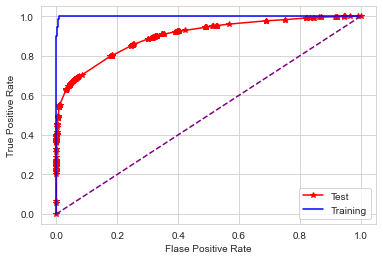

In [79]:
def generate_probs(X, model=Logistic_regression_model_2.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='purple', linestyle="--")
plt.show()

In [80]:
print(f' Roc_Accuracy_Score: {roc_auc_score(y_test, generate_probs(X_test)):.2%}')

 Roc_Accuracy_Score: 90.10%


### Decision Tree 

#### First Iteration

In [81]:
dt_pipeline = Pipeline([
    ('processing_pipeline', Processing_Pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [1,5,10,15],
   'dt__min_samples_split':[1,3,5],
   'dt__min_samples_leaf': [1,2,5]
  }
 ]

Decision_Tree_results1 = GridSearchCV(estimator=dt_pipeline, 
                           param_grid=param_grid,cv=20, scoring='accuracy', refit=True)
Decision_Tree_results1 = Decision_Tree_results1.fit(X_train, y_train)


Decision_Tree_results1.best_estimator_
Decision_Tree_results1.best_params_

{'dt__max_depth': 15, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}

In [82]:
Predict_y_test_dt = Decision_Tree_results1.best_estimator_.predict(X_test)
Predict_y_train_dt= Decision_Tree_results1.best_estimator_.predict(X_train)
print(Predict_y_test_dt)
print(Predict_y_train_dt)

[False False False ... False  True False]
[False False  True ... False False False]


In [83]:
print(f'Test Score: {Decision_Tree_results1.score(X_test, y_test): .2%}')

Test Score:  88.47%


In [84]:
print(f'Train Score: {Decision_Tree_results1.score(X_train, y_train): .2%}')

Train Score:  88.59%


In [85]:
confusion_matrix(y_test,Predict_y_test_dt)

array([[14718,   445],
       [ 1861,  2976]])

In [86]:
print(classification_report(y_test, Decision_Tree_results1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15163
        True       0.87      0.62      0.72      4837

    accuracy                           0.88     20000
   macro avg       0.88      0.79      0.82     20000
weighted avg       0.88      0.88      0.88     20000



In [87]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_dt):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_dt,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_dt,average="macro"):.2%}')

Accuracy Score:88.47%
Precision Score:87.88%
Recall Score:79.30%


In [88]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_dt):.2%}')

F1 Score:72.08%


#### Second Iteration

In [89]:
dtr_pipeline = Pipeline([
    ('processing_pipeline', Processing_Pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [14,15,16],
   'dt__min_samples_split':[4,5,6],
   'dt__min_samples_leaf': [1,2,3]
  }
 ]

Decision_Tree_results2 = GridSearchCV(estimator=dtr_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
Decision_Tree_results2 = Decision_Tree_results2.fit(X_train, y_train)


Decision_Tree_results2.best_estimator_
Decision_Tree_results2.best_params_

{'dt__max_depth': 15, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}

In [90]:
Predict_y_test_dtr = Decision_Tree_results2.best_estimator_.predict(X_test)
Predict_y_train_dtr = Decision_Tree_results2.best_estimator_.predict(X_train)
print(Predict_y_test_dtr)
print(Predict_y_train_dtr)

[False False False ... False  True False]
[False False  True ... False False False]


In [91]:
print(f'Test Score: {Decision_Tree_results2.score(X_test, y_test): .2%}')

Test Score:  88.47%


In [92]:
print(f'Train Score: {Decision_Tree_results2.score(X_train, y_train): .2%}')

Train Score:  88.59%


In [93]:
confusion_matrix(y_test,Predict_y_test_dtr)

array([[14718,   445],
       [ 1861,  2976]])

In [94]:
print(classification_report(y_test, Decision_Tree_results2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15163
        True       0.87      0.62      0.72      4837

    accuracy                           0.88     20000
   macro avg       0.88      0.79      0.82     20000
weighted avg       0.88      0.88      0.88     20000



In [95]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_dtr):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')

Accuracy Score:88.47%
Precision Score:87.88%
Recall Score:79.30%


In [96]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_dtr):.2%}')

F1 Score:72.08%


#### Here if we observe the two iterations are being worked and we got the accurate scores for both iteration and the model is fitted here.

### ROC curve 

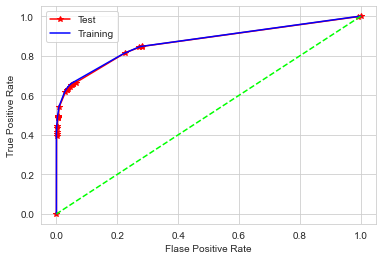

In [97]:
def generate_probs(X, model=Decision_Tree_results2.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='lime', linestyle="--")
plt.show()

In [98]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')

Roc_Accuracy_Score:86.79%


### KNN- Model


In [99]:
knn_pipeline = Pipeline([('processing_pipeline',Processing_Pipeline),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)
knn_results.best_estimator_

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('create_dummies',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Case Number', 'IUCR',
                                                   'Primary Type',
                                                   'FBI Code'])])),
                ('model',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])

In [100]:
Predict_y_test_knn = knn_results.best_estimator_.predict(X_test)
Predict_y_train_knn = knn_results.best_estimator_.predict(X_train)
print(Predict_y_test_knn)
print(Predict_y_train_knn)

[False False False ... False  True False]
[False False  True ... False False  True]


In [101]:
print(f'Test Score: {knn_results.score(X_test, y_test): .2%}')

Test Score:  88.33%


In [102]:
print(f'Train Score: {knn_results.score(X_train, y_train): .2%}')

Train Score:  100.00%


In [103]:
confusion_matrix(y_test,Predict_y_test_knn)

array([[14570,   593],
       [ 1742,  3095]])

In [104]:
print(classification_report(y_test, knn_results.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       False       0.89      0.96      0.93     15163
        True       0.84      0.64      0.73      4837

    accuracy                           0.88     20000
   macro avg       0.87      0.80      0.83     20000
weighted avg       0.88      0.88      0.88     20000



In [105]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_knn):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_knn,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_knn,average="macro"):.2%}')

Accuracy Score:88.33%
Precision Score:86.62%
Recall Score:80.04%


In [106]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_knn):.2%}')

F1 Score:72.61%


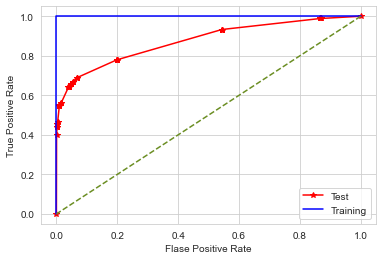

In [107]:
def generate_probs(X, model= knn_results.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='olivedrab', linestyle="--")
plt.show()

In [108]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')

Roc_Accuracy_Score:87.54%


### Results

### Logistic Regression Classifier
1. Logistic Regression Score: 88.59%
2. ROC-Auccuracy Score: 90.10%
3. F1-Score: 72.61%


### Decision-Tree Classifier
1. Logistic Regression Score: 88.59%
2. ROC-Auccuracy Score: 86.79%
3. F1-Score: 72.08%

### KNN-Model 
1. Logistic Regression Score: 88.33%
2. ROC-Auccuracy Score: 87.54%
3. F1-Score: 72.61%

### Final model selection
As we observe here "logistic regression model" performs well as it got 90% accuracy. So, I selected this as the best model for my data.

### Summary

1. Logistic regression performs well among the decision tree model and KNN-model.
2. The roc accuracy score is higher for the logistic regression as it maintains 90.01% 
3. And also comparing the F1 score among the models here also the logistic regression is best with 72.61%. But here in this case both logistic regression and KNN-Model are same with same score so, logistic regression is the best model for this data
4. Coming to the crimes most of the crimes are theft based, in 10th district the crimes are high and also most of the crimes occured in 10th month i.e., October.


### Further Exploration

1. A typical approach is, to improve a model to use more data. In this case, I have only taken the chunk data i.e., upto 100000 but including whole can improve the overall score as taking the chunk lot of data got missed like number of years or months.
2. We could try various techniques, such as a complicated neural network, but this could lead to additional problems and is overkill.
3. For more exploration we can use ensemble models, by using this the scores may get imporved.

### References

1. https://www.geeksforgeeks.org/how-to-load-a-massive-file-as-small-chunks-in-pandas/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/tree.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html